In [2]:
import numpy as np
import pandas as pd

%matplotlib inline

In [4]:
# Load the Titanic dataset (make sure titanic.csv is in your working directory)
df = pd.read_csv("titanic_train.csv")

# Preview the first 5 rows
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Show data types, non-null counts, and memory usage
df.info()

# Count missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Summary statistics for numerical and categorical columns
df.describe(include='all').round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889,714
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,5
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Young Adult
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,358
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN,NaN


In [18]:
# Calculate average survival rate for each gender
df.groupby('Sex')['Survived'].mean().round(2)

Sex
female    0.74
male      0.19
Name: Survived, dtype: float64

In [16]:
# Average survival rate by passenger class (1st, 2nd, 3rd)
df.groupby('Pclass')['Survived'].mean().round(2)

Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64

In [14]:
# Create age groups for easier analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Average survival rate per age group
df.groupby('AgeGroup')['Survived'].mean().round(2)

AgeGroup
Child          0.58
Teen           0.43
Young Adult    0.38
Adult          0.40
Senior         0.23
Name: Survived, dtype: float64

In [15]:
# Show correlation between numeric features (e.g. Age, Fare, Survived)
df.corr(numeric_only=True).round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


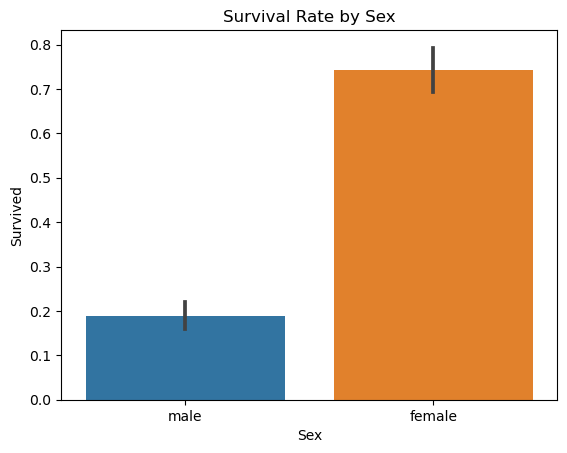

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot of survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

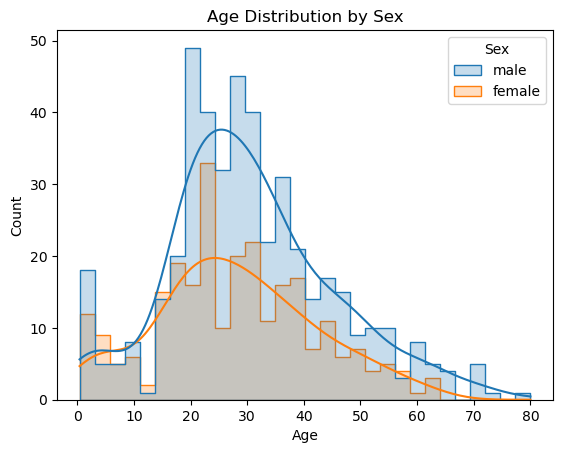

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of Age, separated by Sex
sns.histplot(data=df, x='Age', hue='Sex', bins=30, kde=True, element='step')
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

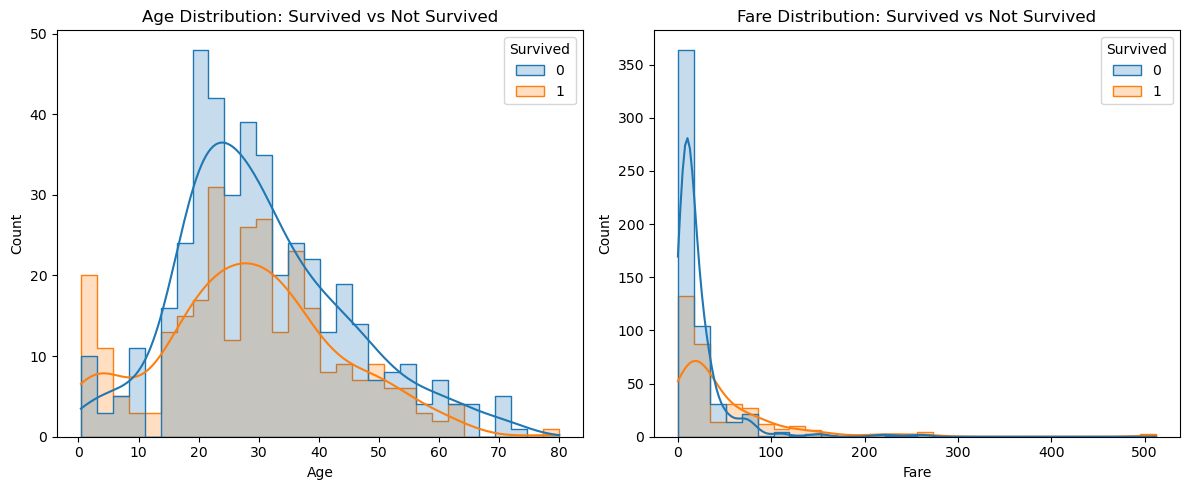

In [21]:
# График распределения возраста по выживанию
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element='step')
plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')

# График распределения стоимости билета по выживанию
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True, element='step')
plt.title('Fare Distribution: Survived vs Not Survived')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

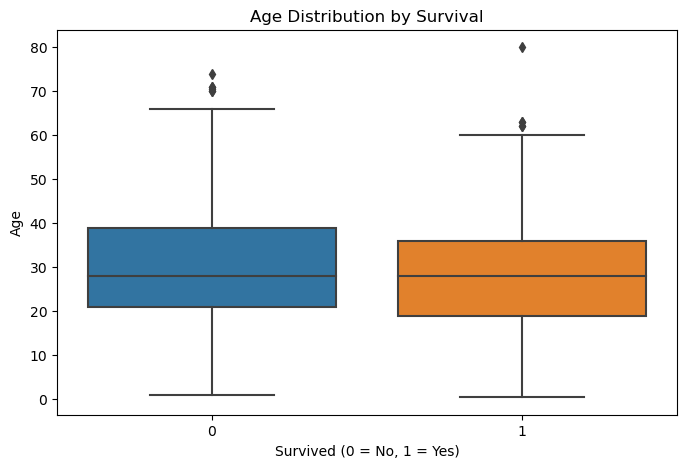

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

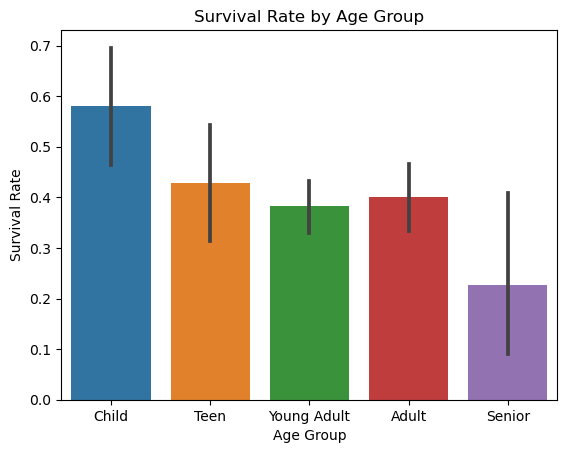

In [23]:
# Категории возрастов
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# График выживаемости по возрастным группам
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()